In [ ]:
import sys
if 'conda' in sys.version:
    !conda install -yc conda-forge ffmpeg

<IPython.core.display.Javascript object>


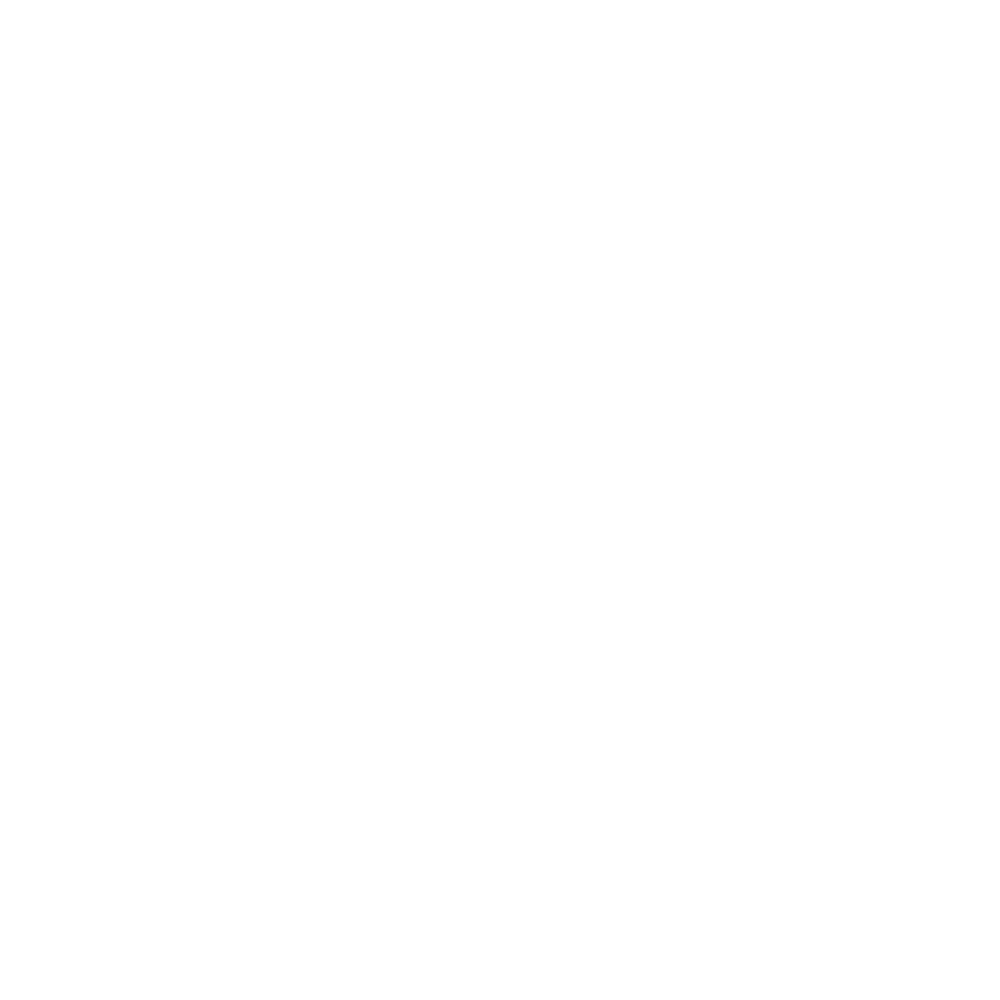

33


In [13]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.patches import Circle
import numpy as np
from IPython.display import HTML
# from matplotlib import rc
# rc('animation', html='html5')

class UpdateDisplay:
    def __init__(self, ax,x0,v0,T,dt,k,fps=30):
        self.ax = ax
        self.x0 = x0
        self.v0 = v0
        self.T = T
        self.dt = dt
        self.k = k
        self.fps = fps
        self.interval = int(1/fps/dt)
        print(self.interval)
        self.N=int(self.T/self.dt)
        self.history = [0]*self.N
        self.ball = Circle((0,0),2)
        self.ax.add_patch(self.ball)
        # Set up plot parameters
        self.ax.set_xlim(-10, 10)
        self.ax.set_ylim(-10, 10)
        self.ax.grid(True)
#         self.ax.axis('off')

    def init(self):
        return self.ball,
    
    def simulate(self):
        x,v = self.x0,self.v0
        for i in range(self.N):
            x_ = x
            x = x+v*self.dt
            v = v-self.k*x_*self.dt
            self.history[i] = x_
            
            
    def __call__(self, i):
        if i == 0:
            return self.init()
        if i%self.interval==0:
            self.ball.center = self.history[i],0
            return self.ball,

T=10
v0=10
x0=0
k=10
dt=0.001
N=int(T/dt)
fig, ax = plt.subplots(figsize=(5,5))

ud = UpdateDisplay(ax,x0=x0,v0=v0,T=T,dt=dt,k=k)
ud.simulate()
anim = animation.FuncAnimation(fig, ud, frames=np.arange(0,N,ud.interval), init_func=ud.init,
                     interval=ud.interval, blit=True)
# plt.show()
plt.close(anim._fig)
HTML(anim.to_html5_video())
# HTML(anim.to_jshtml())

<IPython.core.display.Javascript object>


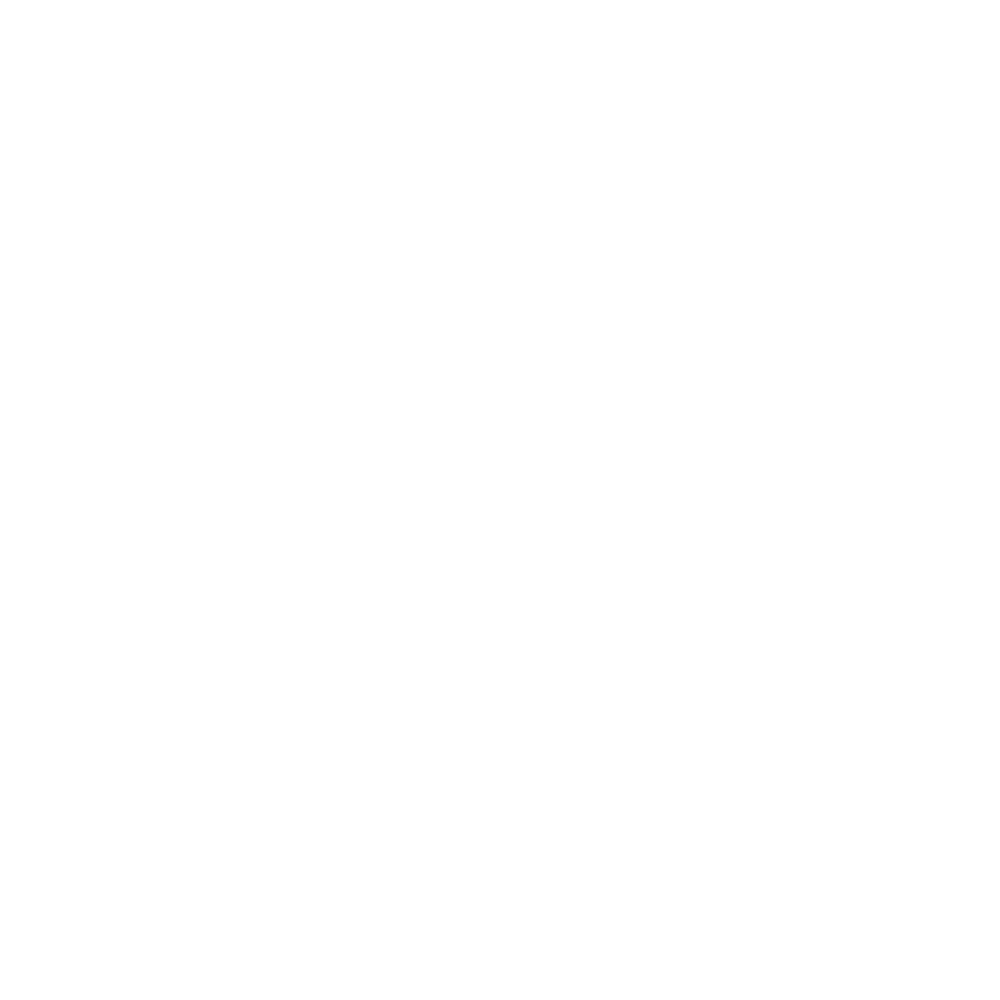

In [56]:
# 多个物体
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.patches import Circle
import matplotlib.colors as colors
import numpy as np
from IPython.display import HTML

class MultipulDisplay:
    def __init__(self, ax,x0,v0,T,dt,k,fps=30,axis_limit=12):
        self.ax = ax
        self.x0 = x0
        self.v0 = v0
        self.T = T
        self.dt = dt
        self.k = k
        self.fps = fps
        self.m = len(x0)
        self.interval = int(1/fps/dt)
        self.N=int(self.T/self.dt)
        self.history = np.zeros((self.m,self.N))
        self.radius = np.linspace(0.5,1,self.m)*3
        self.colors = self.getColorMap(self.m)
        self.zorders = np.linspace(0.1,1,self.m)[::-1]
        self.ball = [Circle((0,0),self.radius[i],color=self.colors[i],zorder=self.zorders[i]) for i in range(self.m)]
        for i in range(self.m):
            self.ax.add_patch(self.ball[i])
        # Set up plot parameters
        self.ax.set_xlim(-axis_limit, axis_limit)
        self.ax.set_ylim(-axis_limit, axis_limit)
        self.ax.grid(True)
        self.ax.axis('off')

    def init(self):
        return self.ball
    
    def simulate(self):
        for i in range(self.m):
            x,v = self.x0[i],self.v0[i]
            for j in range(self.N):
                x_ = x
                x = x+v*self.dt
                v = v-self.k[i]*x_*self.dt
                self.history[i,j] = x_
            
            
    def __call__(self, i):
        if i == 0:
            return self.init()
        if i%self.interval==0:
            for j in range(self.m):
                self.ball[j].center = self.history[j,i],0
            return self.ball
    
    def getColorMap(self,num):
        jet = plt.get_cmap('jet') 
        values = range(num)
        if num < 3:
              jet = plt.get_cmap('prism') 
        cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
        scalarMap = cm.ScalarMappable(norm=cNorm, cmap=jet)
        result = [scalarMap.to_rgba(i) for i in range(num)]
        return result
    
T=30
m = 5
v0=np.ones((m,))*10
# v0=np.linspace(5,10,m)
x0=np.zeros((m,))
k=1.1**np.arange(0,m)
# k=np.ones((m,))*2
dt=0.001
N=int(T/dt)
fig, ax = plt.subplots(figsize=(5,5))

ud = MultipulDisplay(ax,x0=x0,v0=v0,T=T,dt=dt,k=k)
ud.simulate()
anim = animation.FuncAnimation(fig, ud, frames=np.arange(0,N,ud.interval), init_func=ud.init,
                     interval=ud.interval, blit=True)
# plt.show()
plt.close(anim._fig)
HTML(anim.to_html5_video())
# HTML(anim.to_jshtml())

# 圆周运动

<IPython.core.display.Javascript object>


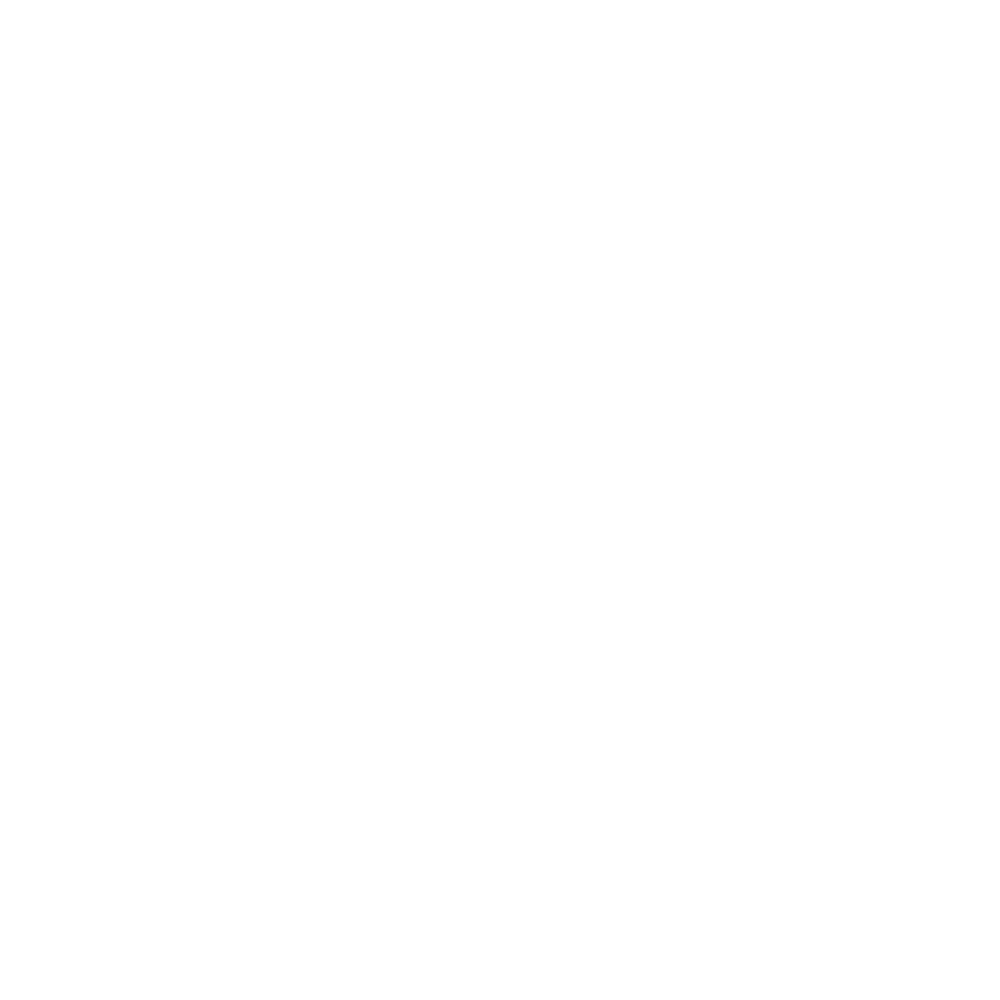

33


In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.patches import Circle
import numpy as np
from IPython.display import HTML
# from matplotlib import rc
# rc('animation', html='html5')

class UpdateDisplay:
    def __init__(self, ax,x0,v0,center,r,T,dt,fps=30,ball_size=0.1):
        self.ax = ax
        self.x0 = x0
        self.v0 = v0
        self.T = T
        self.r = r
        self.center = center
        self.dt = dt
        self.fps = fps
        self.interval = int(1/fps/dt)
        print(self.interval)
        self.N=int(self.T/self.dt)
        self.history = [0]*self.N
        self.ball_size = ball_size
        self.ball = Circle((0,0),self.ball_size)
        self.ax.add_patch(self.ball)
        # Set up plot parameters
        self.ax.set_xlim(-self.r*1.25, self.r*1.25)
        self.ax.set_ylim(-self.r*1.25, self.r*1.25)
        self.ax.grid(True)
#         self.ax.axis('off')

    def init(self):
        return self.ball,
    
    def simulate(self):
        x,v = self.x0,self.v0
        for i in range(self.N):
            sv = np.linalg.norm(v)
            dv = sv**2/self.r*(center-x)/np.linalg.norm(center-x)
            self.history[i] = x
            x = x+v*self.dt
            v = v+dv*self.dt
            
            
            
    def __call__(self, i):
        if i == 0:
            return self.init()
        if i%self.interval==0:
            x,y = self.history[i]
            self.ball.center = x,y
            return self.ball,

T=10
r = 1.0
ball_size = 0.1
v0=np.array([r,0])
x0=np.array([0,r])
center = np.zeros([2])
dt=0.001
N=int(T/dt)
fig, ax = plt.subplots(figsize=(5,5))

ud = UpdateDisplay(ax,x0=x0,v0=v0,center=center,r=r,T=T,dt=dt,ball_size=ball_size)
ud.simulate()
anim = animation.FuncAnimation(fig, ud, frames=np.arange(0,N,ud.interval), init_func=ud.init,
                     interval=ud.interval, blit=True)
# plt.show()
plt.close(anim._fig)
HTML(anim.to_html5_video())
# HTML(anim.to_jshtml())

# 万有引力（卫星）

<IPython.core.display.Javascript object>


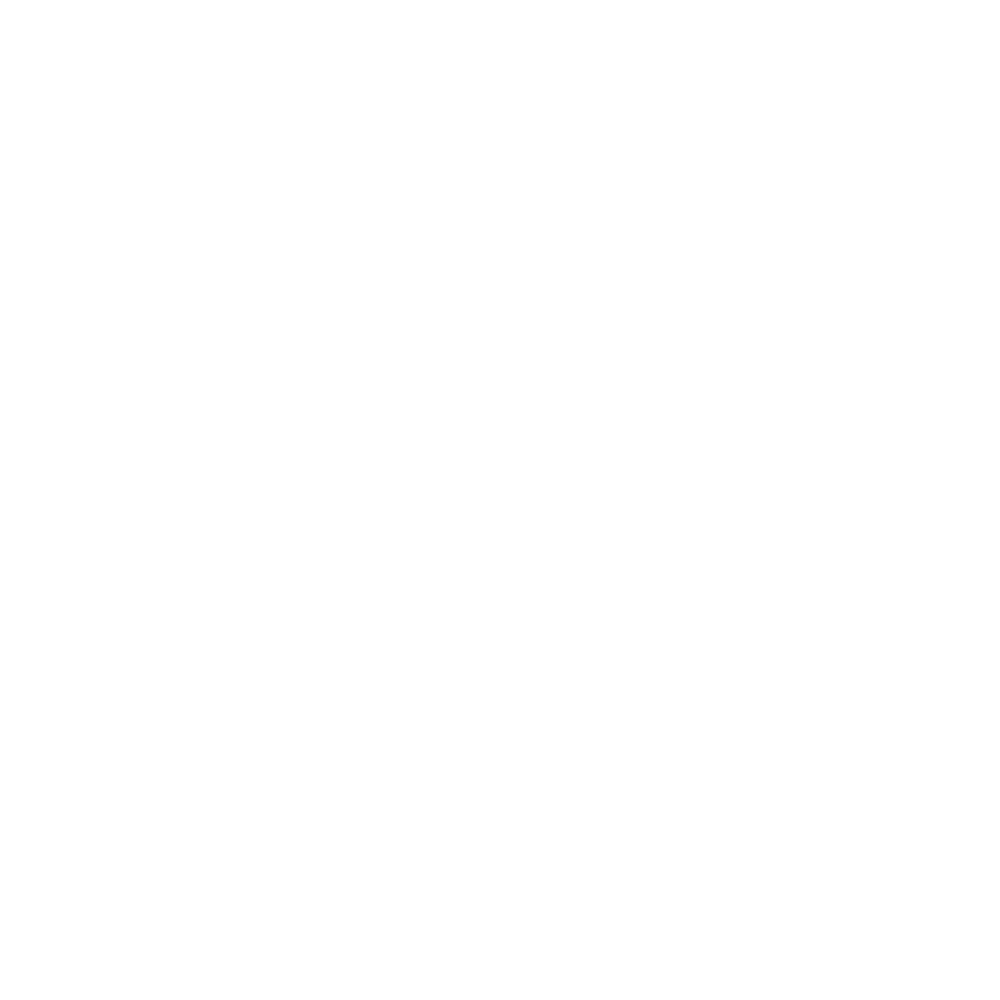

333
模拟中
绘制中
时长： 8.562162162162164 s


In [16]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.patches import Circle
import numpy as np
from IPython.display import HTML
from decimal import Decimal
# from matplotlib import rc
# rc('animation', html='html5')

GRAVITY_G = 6.67259e-11
# GRAVITY_G = 6.67259e-3

class UpdateDisplay:
    def __init__(self, ax,x0,v0,center,M,m,T,dt,fps=30,earth_size=1,ball_size=1,lim=5,acc=1.0):
        self.ax = ax
        self.x0 = x0
        self.v0 = v0
        self.T = T
        self.center = center
        self.M = M
        self.m = m
        self.dt = dt
        self.fps = fps
        self.acc = acc
        self.interval = int(1/fps/dt*acc)
        print(self.interval)
        self.N=int(self.T/self.dt)
        self.history = np.zeros([self.N,2])
        self.earth_size = earth_size
        self.ball_size = ball_size
        self.center_ball = Circle((self.center[0],self.center[1]),self.earth_size,color='b')
        self.ball = Circle((x0[0],x0[1]),self.ball_size,color='r')
        self.trace, = ax.plot(x0[0],x0[1],color='black')
        self.ax.add_patch(self.center_ball)
        self.ax.add_patch(self.ball)
        # Set up plot parameters
        self.ax.set_xlim(-lim, lim)
        self.ax.set_ylim(-lim, lim)
#         self.ax.grid(True)
        self.ax.axis('off')

    def init(self):
        return self.ball,self.trace
    
    def simulate(self):
        x,v = self.x0,self.v0
        for i in range(self.N):
            r = np.linalg.norm(self.center-x)
#             dv = GRAVITY_G*self.M/(r**2)*(self.center-x)/r
            if r>6e6:
                dv = GRAVITY_G*self.M/(r**2)*(self.center-x)/r
            else:
                dv = 0
            self.history[i] = x
            x = x+v*self.dt
            v = v+dv*self.dt
            
            
    def __call__(self, i):
        if i == 0:
            return self.init()
        else:
            x,y = self.history[i]
            self.ball.center = x,y
            self.trace.set_xdata(self.history[max(i-4000,0):i,0])
            self.trace.set_ydata(self.history[max(i-4000,0):i,1])
            return self.ball,self.trace

# T=25
# dt=1e-3
# acc=1.0
T=86400
dt=1
acc=1e4
r = 1.0
M = 5.972e24 # earth
m = 70 # human
earth_size = 6.371e6
ball_size = 0.2*earth_size
height = 3.6e6
v0=np.array([7.9e3,0],dtype=Decimal)
x0=np.array([0,earth_size+height],dtype=Decimal)
center = np.zeros([2],dtype=Decimal)
N=int(T/dt)
fig, ax = plt.subplots(figsize=(5,5))

ud = UpdateDisplay(ax,x0=x0,v0=v0,center=center,M=M,m=m,T=T,dt=dt,earth_size=earth_size,ball_size=ball_size,lim=np.linalg.norm(x0)*4,acc=acc)
print('模拟中')
ud.simulate()
print('绘制中')
print('时长：',N/ud.interval*33/1000,'s')
anim = animation.FuncAnimation(fig, ud, frames=np.arange(0,N,ud.interval), init_func=ud.init,
                     interval=33, blit=True)
# plt.show()
plt.close(anim._fig)
HTML(anim.to_html5_video())
# HTML(anim.to_jshtml())

# 万有引力（二体运动）

<IPython.core.display.Javascript object>


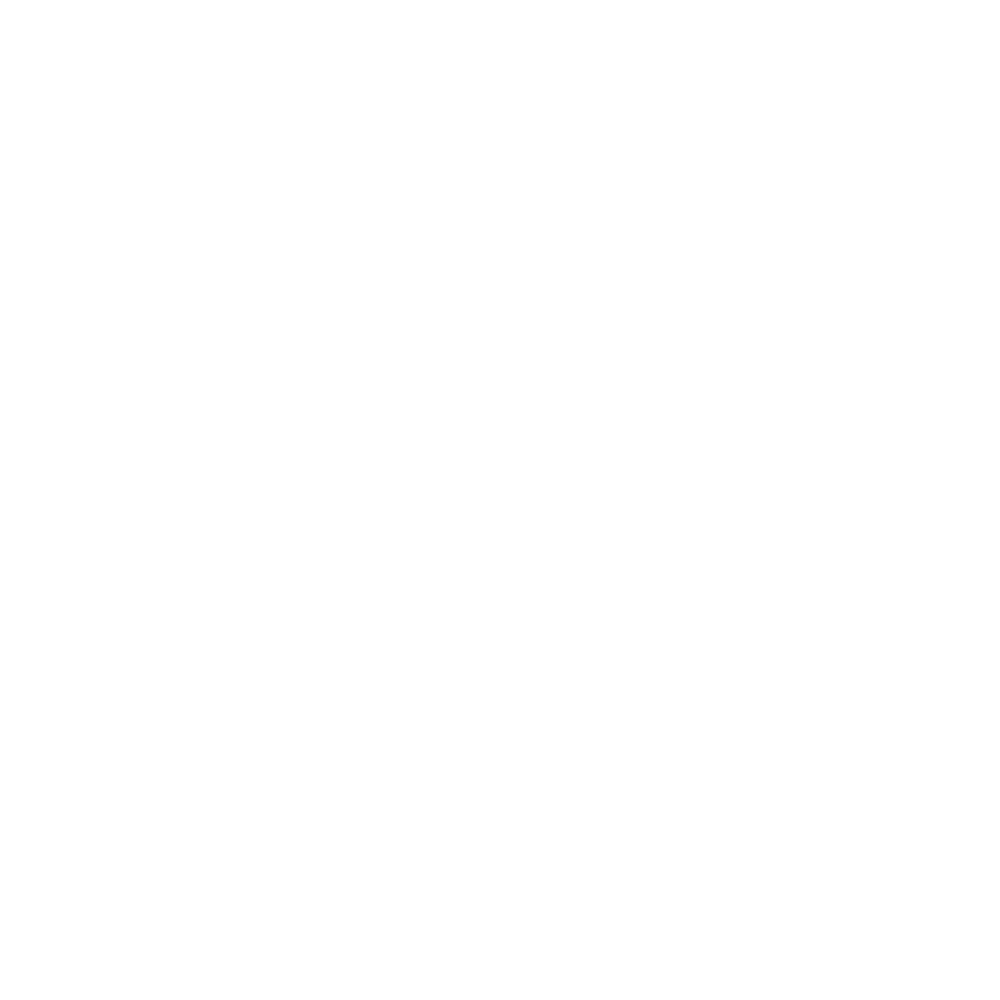

333
模拟中
绘制中
时长： 8.562162162162164 s


In [34]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.patches import Circle
import numpy as np
from IPython.display import HTML
from decimal import Decimal


GRAVITY_G = 6.67259e-11

class MultipleDisplay:
    def __init__(self, ax,x0,v0,m,T,dt,fps=30,ball_size=1,lim=5,acc=1.0):
        self.ax = ax
        self.x0 = x0
        self.v0 = v0
        self.T = T
        self.m = m
        self.dt = dt
        self.fps = fps
        self.acc = acc
        self.interval = int(1/fps/dt*acc)
        print(self.interval)
        self.N=int(self.T/self.dt)
        self.K = len(x0)
        self.history = np.zeros([self.K,self.N,2])
        self.ball_size = ball_size
        self.balls = [0]*self.K
        self.traces = [0]*self.K
        self.thresh = 6e6
        self.tail = 8e3
        for i in range(self.K):
            self.balls[i] = Circle((x0[i,0],x0[i,1]),self.ball_size,color='b')
            self.traces[i], = ax.plot(x0[i,0],x0[i,1],color='black')
            self.ax.add_patch(self.balls[i])
        # Set up plot parameters
        self.ax.set_xlim(-lim, lim)
        self.ax.set_ylim(-lim, lim)
#         self.ax.grid(True)
        self.ax.axis('off')

    def init(self):
        return self.balls+self.traces
    
    def simulate(self):
        eps = 1e-8
        x,v = self.x0,self.v0
        for i in range(self.N):
            x_,v_ = x.copy(),v.copy()
            for j in range(self.K):
                center = x_[j]
                r = np.linalg.norm(x_-center,axis=-1)
                direction = (x_-center)/np.tile((r+eps)[:,None],[1,2])
                magnitude = GRAVITY_G*self.m/np.tile((r**2+eps)[:,None],[1,2])
                dv = magnitude*direction
                dv[r<self.thresh] *= 0
                dv[j] *= 0
                dv = np.sum(dv,axis=0)
                x[j] = x_[j]+v[j]*self.dt
                v[j] = v_[j]+dv*self.dt
                self.history[j,i] = x_[j]
            
    def __call__(self, i):
        if i == 0:
            return self.init()
        else:
            for j in range(self.K):
                x,y = self.history[j,i]
                self.balls[j].center = x,y
                self.traces[j].set_xdata(self.history[j,max(i-int(self.tail),0):i,0])
                self.traces[j].set_ydata(self.history[j,max(i-int(self.tail),0):i,1])
            return self.balls+self.traces

# T=25
# dt=1e-3
# acc=1.0
T=86400
dt=1
acc=1e4
r = 1.0
m = np.array([5.972e24,5.972e24],dtype=np.float64)
earth_size = 6.371e6
height = 3.6e7
v0=np.array([[-1.9e3,0.],[1.9e3,0.]],dtype=np.float64)
x0=np.array([[0.,0.],[0.,earth_size+height]],dtype=np.float64)
N=int(T/dt)
fig, ax = plt.subplots(figsize=(5,5))
ud = MultipleDisplay(ax,x0=x0,v0=v0,m=m,T=T,dt=dt,ball_size=earth_size,lim=np.linalg.norm(x0[1])*4,acc=acc)
print('模拟中')
ud.simulate()
print('绘制中')
print('时长：',N/ud.interval*33/1000,'s')
anim = animation.FuncAnimation(fig, ud, frames=np.arange(0,N,ud.interval), init_func=ud.init,
                     interval=33, blit=True)
# plt.show()
plt.close(anim._fig)
HTML(anim.to_html5_video())


# 万有引力（三体运动）

<IPython.core.display.Javascript object>


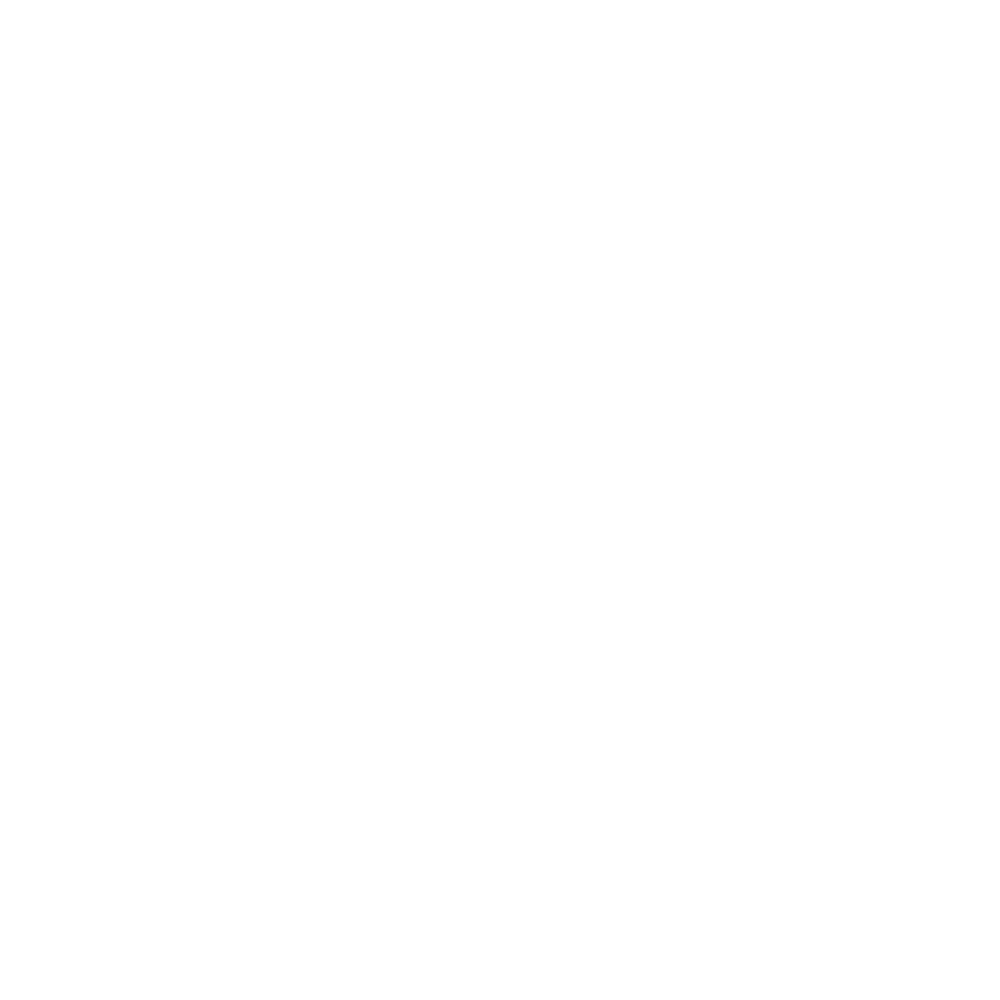

333
模拟中
绘制中
时长： 42.810810810810814 s


In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.patches import Circle
import numpy as np
from IPython.display import HTML
from decimal import Decimal


GRAVITY_G = 6.67259e-11

class MultipleDisplay:
    def __init__(self, ax,x0,v0,m,T,dt,fps=30,ball_size=1,lim=5,acc=1.0):
        self.ax = ax
        self.x0 = x0
        self.v0 = v0
        self.T = T
        self.m = m
        self.dt = dt
        self.fps = fps
        self.acc = acc
        self.interval = int(1/fps/dt*acc)
        print(self.interval)
        self.N=int(self.T/self.dt)
        self.K = len(x0)
        self.history = np.zeros([self.K,self.N,2])
        self.ball_size = ball_size
        self.balls = [0]*self.K
        self.traces = [0]*self.K
        self.thresh = ball_size
        self.tail = 8e3
        for i in range(self.K):
            self.balls[i] = Circle((x0[i,0],x0[i,1]),self.ball_size,color='b')
            self.traces[i], = ax.plot(x0[i,0],x0[i,1],color='black')
            self.ax.add_patch(self.balls[i])
        # Set up plot parameters
        self.ax.set_xlim(-lim, lim)
        self.ax.set_ylim(-lim, lim)
#         self.ax.grid(True)
        self.ax.axis('off')

    def init(self):
        return self.balls+self.traces
    
    def simulate(self):
        eps = 1e-8
        x,v = self.x0,self.v0
        for i in range(self.N):
            x_,v_ = x.copy(),v.copy()
            for j in range(self.K):
                center = x_[j]
                r = np.linalg.norm(x_-center,axis=-1)
                direction = (x_-center)/np.tile((r+eps)[:,None],[1,2])
#                 print(m.shape,r.shape)
#                 magnitude = GRAVITY_G*self.m/np.tile((r**2+eps)[:,None],[1,2])
                magnitude = np.tile(GRAVITY_G*(self.m/(r**2+eps))[:,None],[1,2])
#                 print((GRAVITY_G*self.m/(r**2+eps)).shape)
                dv = magnitude*direction
                dv[r<self.thresh] *= 0
                dv[j] *= 0
                dv = np.sum(dv,axis=0)
                x[j] = x_[j]+v[j]*self.dt
                v[j] = v_[j]+dv*self.dt
                self.history[j,i] = x_[j]
            
    def __call__(self, i):
        if i == 0:
            return self.init()
        else:
            for j in range(self.K):
                x,y = self.history[j,i]
                self.balls[j].center = x,y
                self.traces[j].set_xdata(self.history[j,max(i-int(self.tail),0):i,0])
                self.traces[j].set_ydata(self.history[j,max(i-int(self.tail),0):i,1])
            return self.balls+self.traces

# T=25
# dt=1e-3
# acc=1.0
T=86400*5
dt=1
acc=1e4
r = 1.0
m = np.ones([3],dtype=np.float64)*5.972e24
earth_size = 6.371e6
height = 3.6e7
noise = np.random.random([3,2])*0.001
v0=(np.array([[-1,0.],[1.,0.],[0,0]],dtype=np.float64)+noise)*2.9e3
x0=np.array([[0.,0.],[0.,earth_size+height],[0.,earth_size+height/2]],dtype=np.float64)
N=int(T/dt)
fig, ax = plt.subplots(figsize=(5,5))
ud = MultipleDisplay(ax,x0=x0,v0=v0,m=m,T=T,dt=dt,ball_size=earth_size,lim=np.linalg.norm(x0[1])*2,acc=acc)
print('模拟中')
ud.simulate()
print('绘制中')
print('时长：',N/ud.interval*33/1000,'s')
anim = animation.FuncAnimation(fig, ud, frames=np.arange(0,N,ud.interval), init_func=ud.init,
                     interval=33, blit=True)
# plt.show()
plt.close(anim._fig)
HTML(anim.to_html5_video())
